In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('drive/My Drive/Colab Notebooks/Stock Price Prediction RNN/SBIN.csv')
df = pd.read_csv('SBIN.csv')

# Data Analysis and Visualization

In [ ]:
# Print first 5 rows of dataset
df.head()

In [ ]:
# basic dataset features information
df.info()

In [ ]:
# Summary of numerical columns
df.describe()

In [ ]:
# Checking for null values
df.isnull().sum()

In [4]:
# Drop the 'Date' and 'Adj Close' columns
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [ ]:
df.head()

In [5]:
# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
# Checking for null values
df.isnull().sum()

# Adding Indicators

### SMA

Its the avg of stock price over a specific time period

SMA = (sum of closing price os past n days) / n

It helps identify trends by filtering out shortterm fluctuations

Price above SMA indicate Uptrend and price below SMA indicate lowertrend

In [6]:
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()

In [7]:
df.dropna(subset=['SMA_10', 'SMA_50'], inplace=True)

In [8]:
df.head()

,Open,High,Low,Close,Volume,SMA_10,SMA_50
49,22.649218,22.734135,22.276527,22.635065,39637704.0,23.102579,20.537146
50,22.172739,22.361443,21.837790,22.116129,39109363.0,22.929443,20.603004
51,22.092541,22.186892,21.889683,22.083105,27429706.0,22.757250,20.680184
52,22.073669,22.686958,21.960447,22.611477,27421227.0,22.635065,20.777649
53,22.691675,22.889814,22.465231,22.587889,36343129.0,22.626573,20.875870


##### SMA Graph

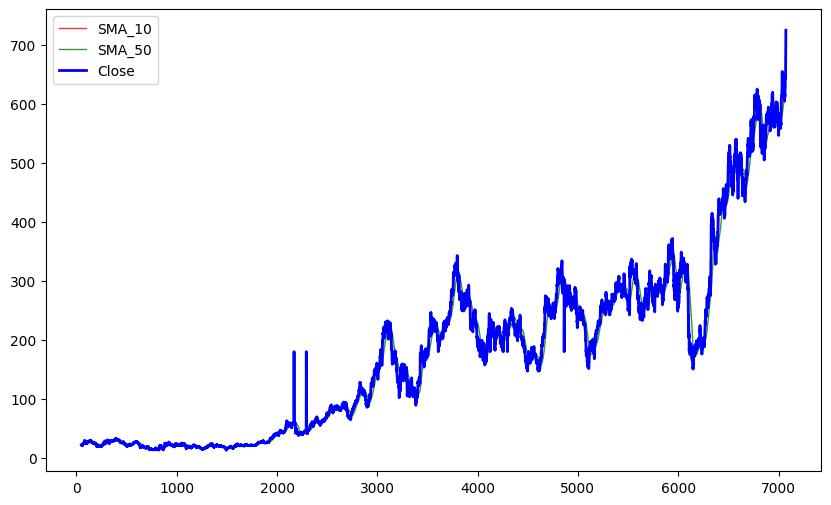

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))
days = int(input("of how many past days you want to see graph: "))
ax1.plot(df["SMA_10"][-days:], label = "SMA_10", color='Red', linewidth=1, alpha=0.8)
ax1.plot(df["SMA_50"][-days:], label = "SMA_50", color='Green', linewidth=1, alpha=0.8)
ax1.plot(df["Close"][-days:], label = "Close", color='Blue', linewidth=2)

plt.legend()
plt.show()

### RSI

It is a momentum indicator used to measure the speed and change of price movements. It ranges from 0 to 100 and helps identify whether a stock is overbought or oversold.  

RSI > 70: Overbought  
RSI < 30: Oversold

In [9]:
delta = df['Close'].diff(1)

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss  # Relative Strength
df['RSI'] = 100 - (100 / (1 + rs))

df.dropna(subset=['RSI'], inplace=True)

##### Representing RSI Graphically

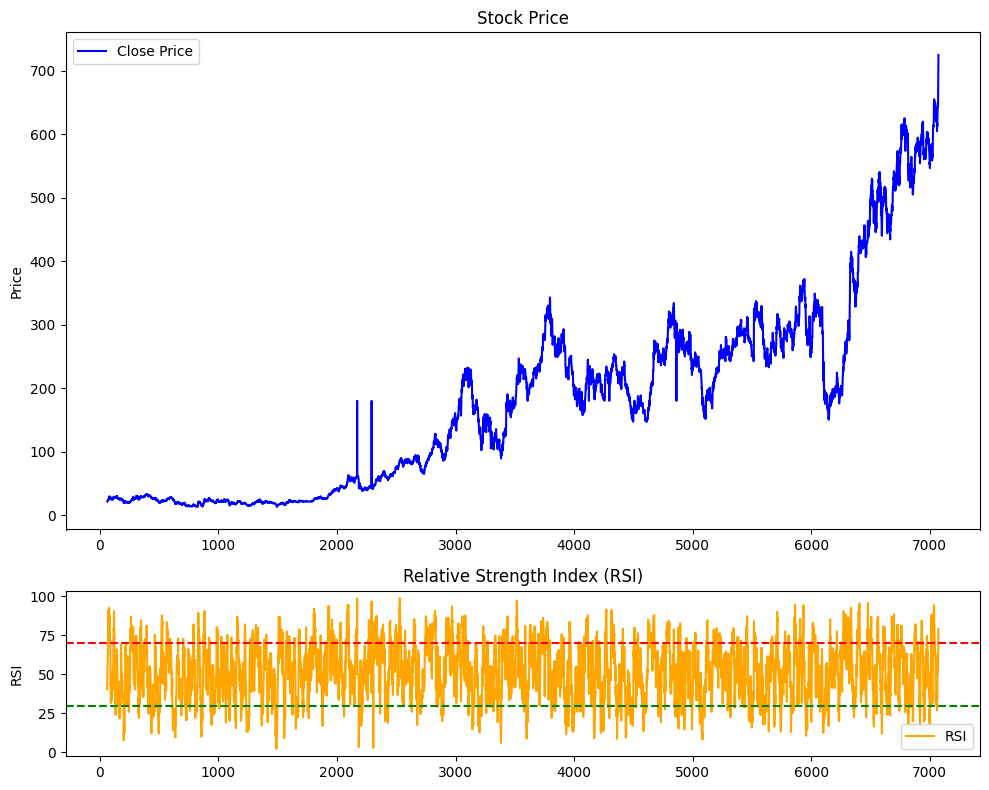

In [11]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

days = int(input("of how many past days you want to see graph: "))
# price graph
ax1.plot(df['Close'][-days:], label='Close Price', color='blue')
ax1.set_title('Stock Price')
ax1.set_ylabel('Price')
ax1.legend()

# rsi graph
ax2.plot(df['RSI'][-days:], label='RSI', color='orange')
ax2.axhline(70, color='red', linestyle='--')  # Overbought line
ax2.axhline(30, color='green', linestyle='--')  # Oversold line
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI')
ax2.legend()

plt.tight_layout()
plt.show()


In [10]:
df.head()

,Open,High,Low,Close,Volume,SMA_10,SMA_50,RSI
62,21.700979,22.031212,21.700979,21.814201,14674821.0,21.633046,21.567471,40.418486
63,21.814201,23.116261,21.856661,22.177458,15454878.0,21.592002,21.662955,45.076147
64,22.314266,22.408621,22.031212,22.210480,21249133.0,21.594833,21.754948,51.133774
65,21.700979,22.927555,21.700979,22.809616,40137428.0,21.715604,21.846659,57.684634
66,23.120977,23.871077,22.517124,23.531408,53712115.0,21.967523,21.948936,59.348024


#### MACD

In [12]:
# Calculate the short-term and long-term EMAs
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD and Signal line
df['MACD'] = df['EMA_12'] - df['EMA_26']  # MACD line
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()  # Signal line

In [13]:
df.head()

,Open,High,Low,Close,Volume,SMA_10,SMA_50,EMA_12,EMA_26,MACD,Signal_Line
49,22.649218,22.734135,22.276527,22.635065,39637704.0,23.102579,20.537146,22.635065,22.635065,0.000000,0.000000
50,22.172739,22.361443,21.837790,22.116129,39109363.0,22.929443,20.603004,22.555229,22.596625,-0.041397,-0.008279
51,22.092541,22.186892,21.889683,22.083105,27429706.0,22.757250,20.680184,22.482594,22.558587,-0.075992,-0.021822
52,22.073669,22.686958,21.960447,22.611477,27421227.0,22.635065,20.777649,22.502422,22.562505,-0.060082,-0.029474
53,22.691675,22.889814,22.465231,22.587889,36343129.0,22.626573,20.875870,22.515571,22.564385,-0.048814,-0.033342


##### MACD Graph

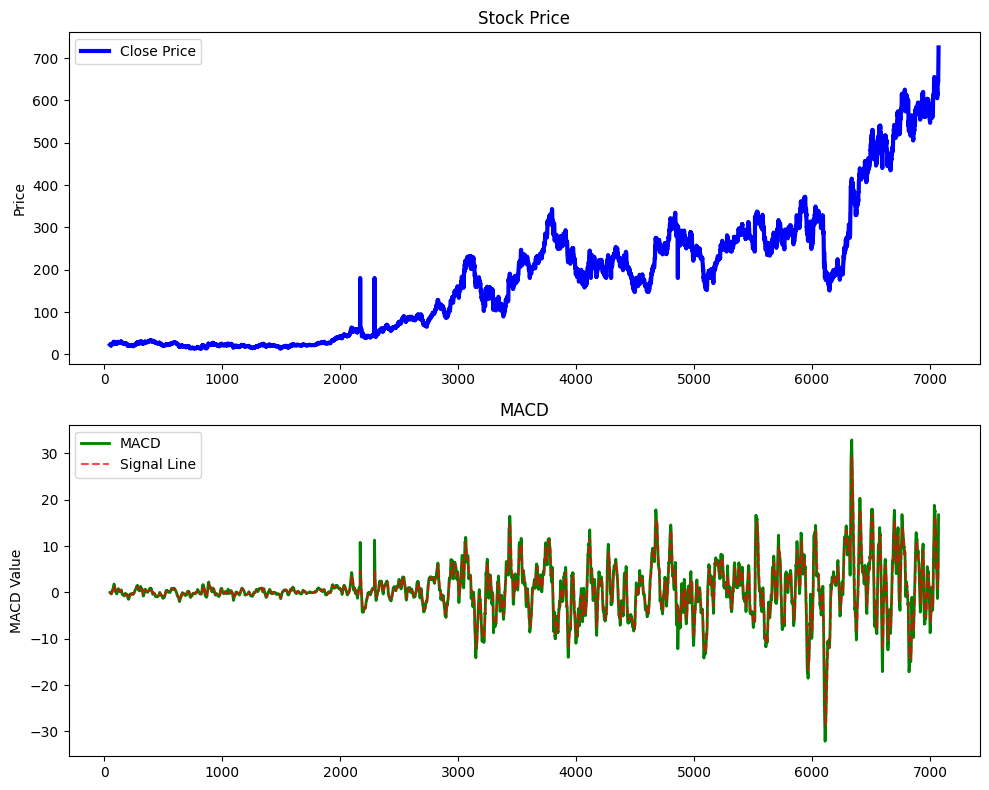

In [14]:
# Plot the MACD
fig, ax = plt.subplots(2, 1, figsize=(10, 8))


days = int(input("of how many past days you want to see graph: "))
# Plot stock price on first subplot (bold)
ax[0].plot( df['Close'][-days:], label='Close Price', color='blue', linewidth=3)
ax[0].set_title('Stock Price')
ax[0].set_ylabel('Price')

# Plot MACD and Signal line on second subplot
ax[1].plot( df['MACD'][-days:], label='MACD', color='green', linewidth=2)
ax[1].plot( df['Signal_Line'][-days:], label='Signal Line', color='red', linestyle='--', alpha=0.7)
ax[1].set_title('MACD')
ax[1].set_ylabel('MACD Value')

# Show legends
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()


Correlations

In [ ]:
corr = df.corr()
corr

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.show()

In [17]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scale the features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

## 1. LINEAR REGRESSION

In [24]:
# Create a linear regression model
model1 = LinearRegression()

In [ ]:
y_train.head()

In [ ]:
# Train the model
model1.fit(X_train, y_train)

In [27]:
# Make predictions on the test set
pred1 = model1.predict(X_test)

In [28]:
# Calculate evaluation metrics
rmse1 = np.sqrt(mean_squared_error(y_test, pred1))
mae1 = mean_absolute_error(y_test, pred1)
mape1 = mean_absolute_percentage_error(y_test, pred1)
accuracy1 = accuracy_score(y_test > pred1, y_test > pred1.round())
precision1 = precision_score(y_test > pred1, y_test > pred1.round())
confusion1 = confusion_matrix(y_test > pred1, y_test > pred1.round())
recall1 = recall_score(y_test > pred1, y_test > pred1.round())
f11 = f1_score(y_test > pred1, y_test > pred1.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse1)
print("MAE:", mae1)
print("MAPE:", mape1)
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Confusion Matrix:\n", confusion1)
print("Recall:", recall1)
print("F1 Score:", f11)

## 2. SVR

In [39]:
from sklearn.svm import SVR

In [40]:
# Create an SVR model
model2 = SVR()

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model2.fit(X_train, y_train)

In [43]:
# Make predictions on the test set
pred2 = model2.predict(X_test)


In [44]:
# Calculate evaluation metrics
rmse2 = np.sqrt(mean_squared_error(y_test, pred2))
mae2 = mean_absolute_error(y_test, pred2)
mape2 = mean_absolute_percentage_error(y_test, pred2)
accuracy2 = accuracy_score(y_test > pred2, y_test > pred2.round())
precision2 = precision_score(y_test > pred2, y_test > pred2.round())
confusion2 = confusion_matrix(y_test > pred2, y_test > pred2.round())
recall2 = recall_score(y_test > pred2, y_test > pred2.round())
f12 = f1_score(y_test > pred2, y_test > pred2.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse2)
print("MAE:", mae2)
print("MAPE:", mape2)
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Confusion Matrix:\n", confusion2)
print("Recall:", recall2)
print("F1 Score:", f12)

## 3. Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest model
model3 = RandomForestRegressor()

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model3.fit(X_train, y_train)

In [49]:
# Make predictions on the test set
pred3 = model3.predict(X_test)

In [50]:
# Calculate evaluation metrics
rmse3 = np.sqrt(mean_squared_error(y_test, pred3))
mae3 = mean_absolute_error(y_test, pred3)
mape3 = mean_absolute_percentage_error(y_test, pred3)
accuracy3 = accuracy_score(y_test > pred3, y_test > pred3.round())
precision3 = precision_score(y_test > pred3, y_test > pred3.round())
confusion3 = confusion_matrix(y_test > pred3, y_test > pred3.round())
recall3 = recall_score(y_test > pred3, y_test > pred3.round())
f13 = f1_score(y_test > pred3, y_test > pred3.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse3)
print("MAE:", mae3)
print("MAPE:", mape3)
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Confusion Matrix:\n", confusion3)
print("Recall:", recall3)
print("F1 Score:", f13)

## 4. Gradient Boosting Models (GBM)

In [52]:
import xgboost as xgb
# Create an XGBoost model
model4 = xgb.XGBRegressor()

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model4.fit(X_train, y_train)

In [55]:
# Make predictions on the test set
pred4 = model4.predict(X_test)

In [56]:
# Calculate evaluation metrics
rmse4 = np.sqrt(mean_squared_error(y_test, pred4))
mae4 = mean_absolute_error(y_test, pred4)
mape4 = mean_absolute_percentage_error(y_test, pred4)
accuracy4 = accuracy_score(y_test > pred4, y_test > pred4.round())
precision4 = precision_score(y_test > pred4, y_test > pred4.round())
confusion4 = confusion_matrix(y_test > pred4, y_test > pred4.round())
recall4 = recall_score(y_test > pred4, y_test > pred4.round())
f14 = f1_score(y_test > pred4, y_test > pred4.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse4)
print("MAE:", mae4)
print("MAPE:", mape4)
print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Confusion Matrix:\n", confusion4)
print("Recall:", recall4)
print("F1 Score:", f14)

## 5. Extreme Gradient Boosting (XGBoost)

In [58]:
import xgboost as xgb
# Create an XGBoost model
model5 = xgb.XGBRegressor()

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model5.fit(X_train, y_train)

In [61]:
# Make predictions on the test set
pred5 = model5.predict(X_test)

In [62]:
# Calculate evaluation metrics
rmse5 = np.sqrt(mean_squared_error(y_test, pred5))
mae5 = mean_absolute_error(y_test, pred5)
mape5 = mean_absolute_percentage_error(y_test, pred5)
accuracy5 = accuracy_score(y_test > pred5, y_test > pred5.round())
precision5 = precision_score(y_test > pred5, y_test > pred5.round())
confusion5 = confusion_matrix(y_test > pred5, y_test > pred5.round())
recall5 = recall_score(y_test > pred5, y_test > pred5.round())
f15 = f1_score(y_test > pred5, y_test > pred5.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse5)
print("MAE:", mae5)
print("MAPE:", mape5)
print("Accuracy:", accuracy5)
print("Precision:", precision5)
print("Confusion Matrix:\n", confusion5)
print("Recall:", recall5)
print("F1 Score:", f15)

## 6. AdaBoostRegressor

In [64]:
from sklearn.ensemble import AdaBoostRegressor
# Create an AdaBoost model
model6 = AdaBoostRegressor()

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model6.fit(X_train, y_train)

In [67]:
# Make predictions on the test set
pred6 = model6.predict(X_test)

In [68]:
# Calculate evaluation metrics
rmse6 = np.sqrt(mean_squared_error(y_test, pred6))
mae6 = mean_absolute_error(y_test, pred6)
mape6 = mean_absolute_percentage_error(y_test, pred6)
accuracy6 = accuracy_score(y_test > pred6, y_test > pred6.round())
precision6 = precision_score(y_test > pred6, y_test > pred6.round())
confusion6 = confusion_matrix(y_test > pred6, y_test > pred6.round())
recall6 = recall_score(y_test > pred6, y_test > pred6.round())
f16 = f1_score(y_test > pred6, y_test > pred6.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse6)
print("MAE:", mae6)
print("MAPE:", mape6)
print("Accuracy:", accuracy6)
print("Precision:", precision6)
print("Confusion Matrix:\n", confusion6)
print("Recall:", recall6)
print("F1 Score:", f16)

## 7. Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
# Create a Decision Tree model
model7 = DecisionTreeRegressor()

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model7.fit(X_train, y_train)

In [73]:
# Make predictions on the test set
pred7 = model7.predict(X_test)

In [74]:
# Calculate evaluation metrics
rmse7 = np.sqrt(mean_squared_error(y_test, pred7))
mae7 = mean_absolute_error(y_test, pred7)
mape7 = mean_absolute_percentage_error(y_test, pred7)
accuracy7 = accuracy_score(y_test > pred7, y_test > pred7.round())
precision7 = precision_score(y_test > pred7, y_test > pred7.round())
confusion7 = confusion_matrix(y_test > pred7, y_test > pred7.round())
recall7 = recall_score(y_test > pred7, y_test > pred7.round())
f17 = f1_score(y_test > pred7, y_test > pred7.round())


In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse7)
print("MAE:", mae7)
print("MAPE:", mape7)
print("Accuracy:", accuracy7)
print("Precision:", precision7)
print("Confusion Matrix:\n", confusion7)
print("Recall:", recall7)
print("F1 Score:", f17)

## 8. KNeighborsRegressor(KNN)

In [76]:
from sklearn.neighbors import KNeighborsRegressor
# Create a KNN model
model8 = KNeighborsRegressor()

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model8.fit(X_train, y_train)

In [79]:
# Make predictions on the test set
pred8 = model8.predict(X_test)

In [80]:
# Calculate evaluation metrics
rmse8 = np.sqrt(mean_squared_error(y_test, pred8))
mae8 = mean_absolute_error(y_test, pred8)
mape8 = mean_absolute_percentage_error(y_test, pred8)
accuracy8 = accuracy_score(y_test > pred8, y_test > pred8.round())
precision8 = precision_score(y_test > pred8, y_test > pred8.round())
confusion8 = confusion_matrix(y_test > pred8, y_test > pred8.round())
recall8 = recall_score(y_test > pred8, y_test > pred8.round())
f18 = f1_score(y_test > pred8, y_test > pred8.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse8)
print("MAE:", mae8)
print("MAPE:", mape8)
print("Accuracy:", accuracy8)
print("Precision:", precision8)
print("Confusion Matrix:\n", confusion8)
print("Recall:", recall8)
print("F1 Score:", f18)

## 9. Artificial Neural Networks (ANN)

In [82]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
# Create an ANN model
model9 = Sequential()
model9.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(1, activation='linear'))

In [85]:
# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model9.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
# Make predictions on the test set
pred9 = model9.predict(X_test_scaled).flatten()

In [88]:
# Calculate evaluation metrics
rmse9 = np.sqrt(mean_squared_error(y_test, pred9))
mae9 = mean_absolute_error(y_test, pred9)
mape9 = mean_absolute_percentage_error(y_test, pred9)
accuracy9 = accuracy_score(y_test > pred9, y_test > pred9.round())
precision9 = precision_score(y_test > pred9, y_test > pred9.round())
confusion9 = confusion_matrix(y_test > pred9, y_test > pred9.round())
recall9 = recall_score(y_test > pred9, y_test > pred9.round())
f19 = f1_score(y_test > pred9, y_test > pred9.round())


In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse9)
print("MAE:", mae9)
print("MAPE:", mape9)
print("Accuracy:", accuracy9)
print("Precision:", precision9)
print("Confusion Matrix:\n", confusion9)
print("Recall:", recall9)
print("F1 Score:", f19)

## 10. LSTM(Long Short term Memory)

In [90]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
# Reshape the input data for LSTM
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1

# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])


In [93]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))


In [94]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
# Train the model
model.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_reshaped).flatten()

In [113]:
# Calculate evaluation metrics
rmse10 = np.sqrt(mean_squared_error(y_test[n_steps-1:], y_pred))
mae10 = mean_absolute_error(y_test[n_steps-1:], y_pred)
mape10 = mean_absolute_percentage_error(y_test[n_steps-1:], y_pred)
accuracy10 = accuracy_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
precision10 = precision_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
recall10 = recall_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
f110 = f1_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
confusion10 = confusion_matrix(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())


In [ ]:
# Print evaluation metrics
print("RMSE:", rmse10)
print("MAE:", mae10)
print("MAPE:", mape10)
print("Accuracy:", accuracy10)
print("Precision:", precision10)
print("Recall:", recall10)
print("F1 Score:", f110)
print("Confusion Matrix:\n", confusion10)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of accuracies from accuracy1 to accuracy10
accuracies = [accuracy1*100, accuracy2*100, accuracy3*100, accuracy4*100, accuracy5*100, accuracy6*100, accuracy7*100, accuracy8*100, accuracy9*100, accuracy10*100]

# List of corresponding labels for each accuracy
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Accuracy Variables')
plt.ylabel('Accuracy Values')
plt.title('Bar Graph of Accuracies')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of RMSE values from rmse1 to rmse10
rmse_values = [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, rmse8, rmse9, rmse10]

# List of corresponding labels for each RMSE value
labels = ['RMSE1', 'RMSE2', 'RMSE3', 'RMSE4', 'RMSE5', 'RMSE6', 'RMSE7', 'RMSE8', 'RMSE9', 'RMSE10']

# Plotting the bar graph
plt.bar(labels, rmse_values, color='green')
plt.xlabel('RMSE Variables')
plt.ylabel('RMSE Values')
plt.title('Bar Graph of RMSE')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of MAE values from mae1 to mae10
mae_values = [mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9, mae10]

# List of corresponding labels for each MAE value
labels = ['MAE1', 'MAE2', 'MAE3', 'MAE4', 'MAE5', 'MAE6', 'MAE7', 'MAE8', 'MAE9', 'MAE10']

# Plotting the bar graph
plt.bar(labels, mae_values, color='orange')
plt.xlabel('MAE Variables')
plt.ylabel('MAE Values')
plt.title('Bar Graph of MAE')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of MAPE values from mape1 to mape10
mape_values = [mape1, mape2, mape3, mape4, mape5, mape6, mape7, mape8, mape9, mape10]

# List of corresponding labels for each MAPE value
labels = ['MAPE1', 'MAPE2', 'MAPE3', 'MAPE4', 'MAPE5', 'MAPE6', 'MAPE7', 'MAPE8', 'MAPE9', 'MAPE10']

# Plotting the bar graph
plt.bar(labels, mape_values, color='purple')
plt.xlabel('MAPE Variables')
plt.ylabel('MAPE Values')
plt.title('Bar Graph of MAPE')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of precision values from precision1 to precision10
precision_values = [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8, precision9, precision10]

# List of corresponding labels for each precision value
labels = ['Precision1', 'Precision2', 'Precision3', 'Precision4', 'Precision5', 'Precision6', 'Precision7', 'Precision8', 'Precision9', 'Precision10']

# Plotting the bar graph
plt.bar(labels, precision_values, color='red')
plt.xlabel('Precision Variables')
plt.ylabel('Precision Values')
plt.title('Bar Graph of Precision')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of recall values from recall1 to recall10
recall_values = [recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8, recall9, recall10]

# List of corresponding labels for each recall value
labels = ['Recall1', 'Recall2', 'Recall3', 'Recall4', 'Recall5', 'Recall6', 'Recall7', 'Recall8', 'Recall9', 'Recall10']

# Plotting the bar graph
plt.bar(labels, recall_values, color='cyan')
plt.xlabel('Recall Variables')
plt.ylabel('Recall Values')
plt.title('Bar Graph of Recall')
plt.show()
